In [1]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

2024-06-22 12:20:41.327873: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-22 12:20:41.331334: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-22 12:20:41.369464: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-22 12:20:42.013116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing1_2_horizontal.npy")
# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing1_2_vertical.npy")
# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing1_2_combined.npy")

# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing2_2_horizontal.npy")
# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing2_2_vertical.npy")
# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing2_2_combined.npy")

# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing3_5_horizontal.npy")
# X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing3_5_vertical.npy")
X_train = np.load("../interpolated_An_BPFOs_norm_XJTU_SY_Bearing3_5_combined.npy")

In [3]:
seed = 2 # had to change this to 2 for some reason in bearing3_5 only, otherwise all zeros as output

tf.keras.utils.set_random_seed(
    seed
)

# Define the structure of the autoencoder
input_dim = 3
encoding_dim = 2

# Input layers
input_layer = Input(shape=(input_dim,), name="input")
encoder = Dense(2, activation='relu')(input_layer)
HI_values = Dense(1, activation='relu', name="HI_values")(encoder)
decoder = Dense(2, activation='relu')(HI_values)
# Outputlayer -----> MAYBE met andere activation
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

adam = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=adam, loss='mse', metrics=["accuracy"])

# Print summary of the model
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=1, shuffle=True)

HI_values = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('HI_values').output)

2024-06-22 12:20:42.946784: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HI_values (Dense)               │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.5383 - loss: 0.2528    
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5172 - loss: 0.1654 
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.3632 - loss: 0.1523 
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.2861 - loss: 0.1478 
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.3114 - loss: 0.1455 
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5245 - loss: 0.1440 
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5383 - loss: 0.1429 
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5564 - loss: 0.1422 
Epoch 9/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5169 - loss: 0.1353 
Epoch 10/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.3206 - loss: 0.0349 
Epoch 11/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.1244 - loss: 0.0193 
Epoch 12/20
114/

In [4]:
test = autoencoder.predict(X_train)
# print(test)
# print(autoencoder.layers[2].output)
test_HI = HI_values.predict(X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


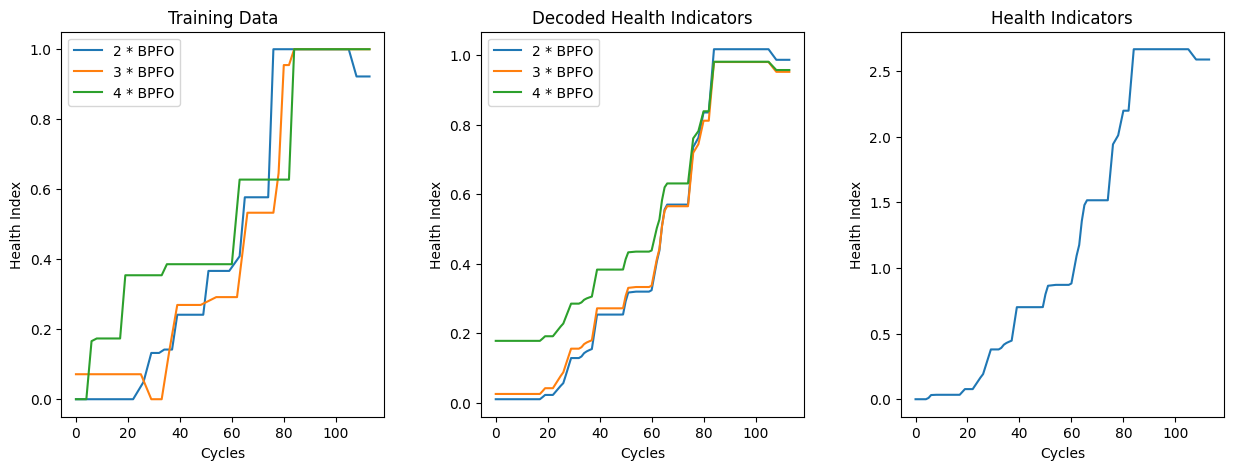

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the data
ax1.plot(X_train, label=["2 * BPFO", "3 * BPFO", "4 * BPFO"])
ax2.plot(test, label=["2 * BPFO", "3 * BPFO", "4 * BPFO"])
ax3.plot(test_HI)

# Adding titles
ax1.set_title('Training Data')
ax2.set_title('Decoded Health Indicators')
ax3.set_title('Health Indicators')

# Adding axis labels
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Health Index')8

ax2.set_xlabel('Cycles')
ax2.set_ylabel('Health Index')

ax3.set_xlabel('Cycles')
ax3.set_ylabel('Health Index')

# legend
ax1.legend()
ax2.legend()

# Adjusting space between subplots
plt.subplots_adjust(wspace=0.3)

# Saving the figure
plt.savefig("../plotjesvoorscriptie/XJTU-SY_Bearing3_5/HI_Bearing3_5_combined.pdf")

# Showing the figure
plt.show()

0    2.653232
dtype: float64
<class 'pandas.core.frame.DataFrame'>


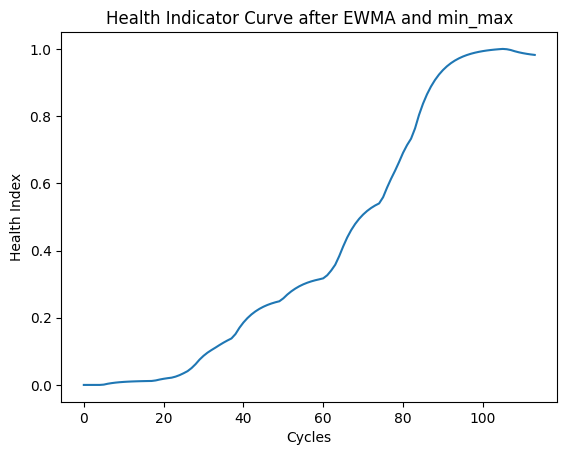

In [6]:
import pandas as pd
test_df = pd.DataFrame(test_HI)

test = test_df.ewm(com = 5).mean()

test_norm = (test - test.min()) / (test.max() - test.min())
print(test.max())

print(type(test_norm))
test_norm.to_pickle("hicurve_XJTU-SY_Bearing3_5_combined.pkl")


# plt.plot(test)
plt.plot(test_norm)

plt.title("Health Indicator Curve after EWMA and min_max")
plt.xlabel("Cycles")
plt.ylabel("Health Index")
plt.savefig("../plotjesvoorscriptie/XJTU-SY_Bearing3_5/HI_norm_Bearing3_5_combined.pdf")
plt.show()

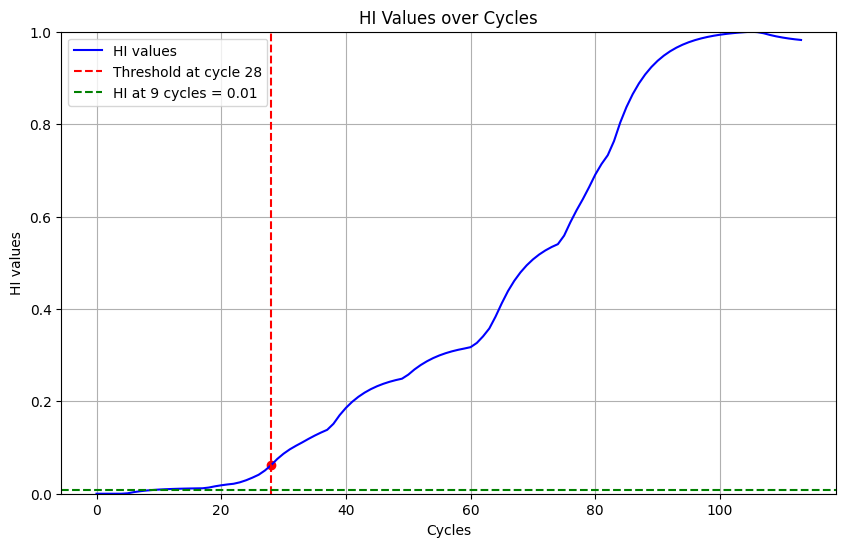

In [7]:
cycles = np.arange(0, len(test_norm))
HI_values = test_norm[0]

reference_cycle = round(len(test_norm) * 0.076219512)
HI_reference = HI_values[reference_cycle]

# Determine the threshold
threshold_index = None
for i in range(len(cycles)):
    if abs(HI_reference - HI_values[i]) > 0.05: # I CHANGED THIS PART FROM 0.02 TO 0.05
        threshold_index = i
        break

plt.figure(figsize=(10, 6))
plt.plot(cycles, HI_values, label='HI values', color='blue')

if threshold_index is not None:
    plt.axvline(x=threshold_index, color='red', linestyle='--', label=f'Threshold at cycle {threshold_index}')
    plt.scatter(threshold_index, HI_values[threshold_index], color='red')

plt.axhline(y=HI_reference, color='green', linestyle='--', label=f'HI at {reference_cycle} cycles = {HI_reference:.2f}')
plt.xlabel('Cycles')
plt.ylabel('HI values')
plt.ylim(0, 1)
plt.title('HI Values over Cycles')
plt.legend()
plt.grid(True)
plt.savefig("../plotjesvoorscriptie/XJTU-SY_Bearing3_5/HI_Treshold_XJTU-SY_Bearing3_5_combined.pdf")
plt.show()

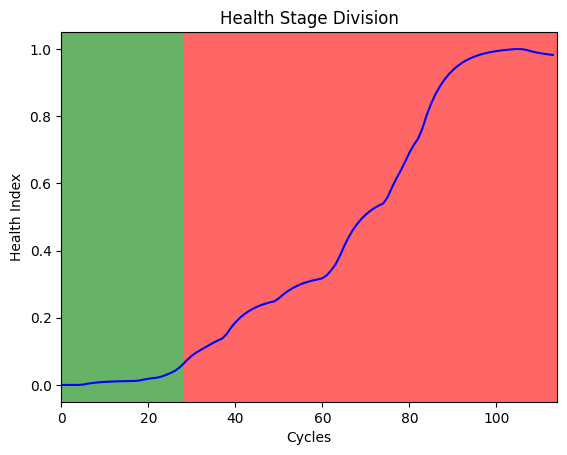

In [8]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Set the entire background color (optional, in case you want a base color)
ax.set_facecolor('white')

# Use axvspan to create background spans
# First color background from x=0 to x=5
ax.axvspan(0, threshold_index, facecolor='green', alpha=0.6)

# Second color background from x=5 to x=10
ax.axvspan(threshold_index, len(test_norm), facecolor='red', alpha=0.6)

# Plot your data
ax.plot(test_norm, color='blue')

ax.set_xlim(0, len(test_norm))

# Set axis labels and title
ax.set_xlabel('Cycles')
ax.set_ylabel('Health Index')
ax.set_title('Health Stage Division')

plt.savefig("../plotjesvoorscriptie/XJTU-SY_Bearing3_5/health_stage_XJTU-SY_Bearing3_5_combined.pdf")

# Display the plot
plt.show()